# Mount my drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [3]:
!pip install pytorch-ignite

In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
import random

try:
  from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
  from ignite.metrics import Accuracy, Loss, ConfusionMatrix
  from ignite.handlers import ModelCheckpoint
except ImportError:
  raise RuntimeError("no module Ignite, to install Ignite: 'pip install pytorch-ignite'.")

from tqdm import tqdm

from utils.models import NoBinaryNetMnist, BinaryNetMNIST, get_my_model_MNIST, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_mnist_dataloaders
from utils.training import run, evaluate
from visualize.viz import visTensor,get_activation
from utils.functions import Hardsigmoid

# Dataset:

In [4]:
batch_size_train = 64
batch_size_test = 1000
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 844
Number of testing examples: 10


# Training:

## Training parameters:

In [0]:
epochs = 30
lr = 0.01
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [6]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_MNIST(binary)
print(name_model)

NonBinaryNet


ITERATION - loss: 1.25: 100%|█████████▉| 840/844 [00:15<00:00, 91.75it/s]

Training Results - Epoch: 1  Avg accuracy: 79.73 Avg loss: 1.17


ITERATION - loss: 1.19:   2%|▏         | 20/844 [00:17<02:28,  5.55it/s]

Validation Results - Epoch: 1  Avg accuracy: 79.50 Avg loss: 1.16


ITERATION - loss: 0.78: 100%|█████████▉| 840/844 [00:32<00:00, 99.50it/s]

Training Results - Epoch: 2  Avg accuracy: 84.78 Avg loss: 0.78


ITERATION - loss: 0.75:   2%|▏         | 20/844 [00:33<02:25,  5.66it/s]

Validation Results - Epoch: 2  Avg accuracy: 84.83 Avg loss: 0.78


ITERATION - loss: 0.69: 850it [00:49, 94.39it/s]

Training Results - Epoch: 3  Avg accuracy: 86.68 Avg loss: 0.62


ITERATION - loss: 0.63:   1%|          | 10/844 [00:50<03:25,  4.05it/s]

Validation Results - Epoch: 3  Avg accuracy: 87.17 Avg loss: 0.62


ITERATION - loss: 0.55: 100%|█████████▉| 840/844 [01:07<00:00, 86.63it/s]

Training Results - Epoch: 4  Avg accuracy: 88.15 Avg loss: 0.53


ITERATION - loss: 0.56:   2%|▏         | 20/844 [01:08<02:37,  5.24it/s]

Validation Results - Epoch: 4  Avg accuracy: 88.42 Avg loss: 0.52


ITERATION - loss: 0.57: 850it [01:25, 90.06it/s]

Training Results - Epoch: 5  Avg accuracy: 88.99 Avg loss: 0.47


ITERATION - loss: 0.46:   1%|          | 10/844 [01:26<03:45,  3.70it/s]

Validation Results - Epoch: 5  Avg accuracy: 89.18 Avg loss: 0.46


ITERATION - loss: 0.53: 100%|█████████▉| 840/844 [01:43<00:00, 84.09it/s]

Training Results - Epoch: 6  Avg accuracy: 90.15 Avg loss: 0.42


ITERATION - loss: 0.41:   1%|          | 10/844 [01:44<03:50,  3.62it/s] 

Validation Results - Epoch: 6  Avg accuracy: 90.50 Avg loss: 0.42


ITERATION - loss: 0.37: 100%|█████████▉| 840/844 [02:02<00:00, 87.64it/s]

Training Results - Epoch: 7  Avg accuracy: 90.96 Avg loss: 0.39


ITERATION - loss: 0.40:   2%|▏         | 20/844 [02:03<02:43,  5.03it/s]

Validation Results - Epoch: 7  Avg accuracy: 91.18 Avg loss: 0.38


ITERATION - loss: 0.33: 850it [02:20, 88.66it/s]

Training Results - Epoch: 8  Avg accuracy: 91.54 Avg loss: 0.36


ITERATION - loss: 0.30:   1%|          | 10/844 [02:21<03:45,  3.69it/s]

Validation Results - Epoch: 8  Avg accuracy: 91.87 Avg loss: 0.35


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [02:38<00:00, 91.58it/s]

Training Results - Epoch: 9  Avg accuracy: 92.00 Avg loss: 0.33


ITERATION - loss: 0.27:   2%|▏         | 20/844 [02:39<02:39,  5.16it/s]

Validation Results - Epoch: 9  Avg accuracy: 92.52 Avg loss: 0.33


ITERATION - loss: 0.23: 850it [02:57, 85.29it/s]

Training Results - Epoch: 10  Avg accuracy: 92.58 Avg loss: 0.31


ITERATION - loss: 0.24:   1%|          | 10/844 [02:58<03:54,  3.56it/s]

Validation Results - Epoch: 10  Avg accuracy: 93.05 Avg loss: 0.31


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [03:16<00:00, 84.66it/s]

Training Results - Epoch: 11  Avg accuracy: 92.96 Avg loss: 0.29


ITERATION - loss: 0.39:   1%|          | 10/844 [03:17<03:53,  3.57it/s] 

Validation Results - Epoch: 11  Avg accuracy: 93.35 Avg loss: 0.29


ITERATION - loss: 0.40: 100%|█████████▉| 840/844 [03:34<00:00, 84.03it/s]

Training Results - Epoch: 12  Avg accuracy: 93.30 Avg loss: 0.28


ITERATION - loss: 0.27:   2%|▏         | 20/844 [03:36<02:45,  4.99it/s]

Validation Results - Epoch: 12  Avg accuracy: 93.52 Avg loss: 0.27


ITERATION - loss: 0.30: 850it [03:53, 90.31it/s]

Training Results - Epoch: 13  Avg accuracy: 93.76 Avg loss: 0.26


ITERATION - loss: 0.32:   1%|          | 10/844 [03:54<03:45,  3.69it/s]

Validation Results - Epoch: 13  Avg accuracy: 94.02 Avg loss: 0.26


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [04:11<00:00, 90.57it/s]

Training Results - Epoch: 14  Avg accuracy: 94.01 Avg loss: 0.25


ITERATION - loss: 0.23:   2%|▏         | 20/844 [04:12<02:38,  5.21it/s]

Validation Results - Epoch: 14  Avg accuracy: 94.22 Avg loss: 0.25


ITERATION - loss: 0.19: 850it [04:29, 93.38it/s]

Training Results - Epoch: 15  Avg accuracy: 94.27 Avg loss: 0.24


ITERATION - loss: 0.24:   1%|          | 10/844 [04:30<03:35,  3.87it/s]

Validation Results - Epoch: 15  Avg accuracy: 94.33 Avg loss: 0.24


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [04:46<00:00, 91.69it/s]

Training Results - Epoch: 16  Avg accuracy: 94.56 Avg loss: 0.23


ITERATION - loss: 0.23:   2%|▏         | 20/844 [04:47<02:32,  5.41it/s]

Validation Results - Epoch: 16  Avg accuracy: 94.53 Avg loss: 0.22


ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [05:04<00:00, 89.44it/s]

Training Results - Epoch: 17  Avg accuracy: 94.70 Avg loss: 0.22


ITERATION - loss: 0.21:   2%|▏         | 20/844 [05:05<02:35,  5.30it/s]

Validation Results - Epoch: 17  Avg accuracy: 94.78 Avg loss: 0.22


ITERATION - loss: 0.16: 850it [05:21, 92.13it/s]

Training Results - Epoch: 18  Avg accuracy: 94.91 Avg loss: 0.21


ITERATION - loss: 0.27:   1%|          | 10/844 [05:22<03:38,  3.82it/s]

Validation Results - Epoch: 18  Avg accuracy: 95.00 Avg loss: 0.21


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [05:39<00:00, 93.56it/s]

Training Results - Epoch: 19  Avg accuracy: 95.06 Avg loss: 0.20


ITERATION - loss: 0.20:   2%|▏         | 20/844 [05:40<02:32,  5.41it/s]

Validation Results - Epoch: 19  Avg accuracy: 95.07 Avg loss: 0.20


ITERATION - loss: 0.24: 850it [05:57, 90.36it/s]

Training Results - Epoch: 20  Avg accuracy: 95.29 Avg loss: 0.20


ITERATION - loss: 0.11:   1%|          | 10/844 [05:58<03:36,  3.85it/s]

Validation Results - Epoch: 20  Avg accuracy: 95.25 Avg loss: 0.19


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [06:14<00:00, 91.21it/s]

Training Results - Epoch: 21  Avg accuracy: 95.40 Avg loss: 0.19


ITERATION - loss: 0.25:   2%|▏         | 20/844 [06:15<02:30,  5.48it/s]

Validation Results - Epoch: 21  Avg accuracy: 95.37 Avg loss: 0.19


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [06:31<00:00, 92.76it/s]

Training Results - Epoch: 22  Avg accuracy: 95.58 Avg loss: 0.18


ITERATION - loss: 0.18:   2%|▏         | 20/844 [06:32<02:28,  5.54it/s]

Validation Results - Epoch: 22  Avg accuracy: 95.57 Avg loss: 0.18


ITERATION - loss: 0.33: 850it [06:49, 95.42it/s]

Training Results - Epoch: 23  Avg accuracy: 95.64 Avg loss: 0.18


ITERATION - loss: 0.21:   1%|          | 10/844 [06:50<03:38,  3.82it/s]

Validation Results - Epoch: 23  Avg accuracy: 95.65 Avg loss: 0.18


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [07:06<00:00, 89.22it/s]

Training Results - Epoch: 24  Avg accuracy: 95.79 Avg loss: 0.17


ITERATION - loss: 0.24:   2%|▏         | 20/844 [07:07<02:31,  5.43it/s]

Validation Results - Epoch: 24  Avg accuracy: 95.70 Avg loss: 0.17


ITERATION - loss: 0.21: 850it [07:24, 86.68it/s]

Training Results - Epoch: 25  Avg accuracy: 95.93 Avg loss: 0.17


ITERATION - loss: 0.23:   1%|          | 10/844 [07:25<03:41,  3.77it/s]

Validation Results - Epoch: 25  Avg accuracy: 95.75 Avg loss: 0.17


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [07:42<00:00, 91.83it/s]

Training Results - Epoch: 26  Avg accuracy: 95.96 Avg loss: 0.16


ITERATION - loss: 0.15:   1%|          | 10/844 [07:42<03:39,  3.81it/s] 

Validation Results - Epoch: 26  Avg accuracy: 96.00 Avg loss: 0.16


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [07:59<00:00, 92.32it/s]

Training Results - Epoch: 27  Avg accuracy: 96.10 Avg loss: 0.16


ITERATION - loss: 0.10:   2%|▏         | 20/844 [08:00<02:33,  5.37it/s]

Validation Results - Epoch: 27  Avg accuracy: 96.03 Avg loss: 0.16


ITERATION - loss: 0.13: 850it [08:17, 93.72it/s]

Training Results - Epoch: 28  Avg accuracy: 96.14 Avg loss: 0.16


ITERATION - loss: 0.23:   1%|          | 10/844 [08:18<03:36,  3.86it/s]

Validation Results - Epoch: 28  Avg accuracy: 96.08 Avg loss: 0.16


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [08:34<00:00, 93.25it/s]

Training Results - Epoch: 29  Avg accuracy: 96.22 Avg loss: 0.15


ITERATION - loss: 0.19:   2%|▏         | 20/844 [08:35<02:32,  5.42it/s]

Validation Results - Epoch: 29  Avg accuracy: 96.07 Avg loss: 0.15


ITERATION - loss: 0.07: 850it [08:52, 94.74it/s]

Training Results - Epoch: 30  Avg accuracy: 96.28 Avg loss: 0.15


ITERATION - loss: 0.11:   1%|          | 10/844 [08:53<03:40,  3.78it/s]

Validation Results - Epoch: 30  Avg accuracy: 96.22 Avg loss: 0.15


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [09:10<00:00, 91.06it/s]

Training Results - Epoch: 31  Avg accuracy: 96.41 Avg loss: 0.15


ITERATION - loss: 0.06:   2%|▏         | 20/844 [09:11<02:34,  5.34it/s]

Validation Results - Epoch: 31  Avg accuracy: 96.23 Avg loss: 0.15


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [09:27<00:00, 94.12it/s]

Training Results - Epoch: 32  Avg accuracy: 96.51 Avg loss: 0.14


ITERATION - loss: 0.06:   2%|▏         | 20/844 [09:28<02:32,  5.39it/s]

Validation Results - Epoch: 32  Avg accuracy: 96.35 Avg loss: 0.14


ITERATION - loss: 0.10: 850it [09:45, 87.32it/s]

Training Results - Epoch: 33  Avg accuracy: 96.51 Avg loss: 0.14


ITERATION - loss: 0.18:   1%|          | 10/844 [09:46<03:38,  3.82it/s]

Validation Results - Epoch: 33  Avg accuracy: 96.45 Avg loss: 0.14


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [10:02<00:00, 87.94it/s]

Training Results - Epoch: 34  Avg accuracy: 96.58 Avg loss: 0.14


ITERATION - loss: 0.21:   2%|▏         | 20/844 [10:03<02:31,  5.44it/s]

Validation Results - Epoch: 34  Avg accuracy: 96.50 Avg loss: 0.14


ITERATION - loss: 0.11: 850it [10:20, 92.50it/s]

Training Results - Epoch: 35  Avg accuracy: 96.62 Avg loss: 0.13


ITERATION - loss: 0.11:   1%|          | 10/844 [10:21<03:42,  3.75it/s]

Validation Results - Epoch: 35  Avg accuracy: 96.52 Avg loss: 0.14


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [10:38<00:00, 92.79it/s]

Training Results - Epoch: 36  Avg accuracy: 96.71 Avg loss: 0.13


ITERATION - loss: 0.13:   2%|▏         | 20/844 [10:39<02:36,  5.26it/s]

Validation Results - Epoch: 36  Avg accuracy: 96.62 Avg loss: 0.13


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [10:56<00:00, 88.54it/s]

Training Results - Epoch: 37  Avg accuracy: 96.77 Avg loss: 0.13


ITERATION - loss: 0.20:   2%|▏         | 20/844 [10:57<02:37,  5.25it/s]

Validation Results - Epoch: 37  Avg accuracy: 96.80 Avg loss: 0.13


ITERATION - loss: 0.19: 850it [11:14, 89.22it/s]

Training Results - Epoch: 38  Avg accuracy: 96.82 Avg loss: 0.13


ITERATION - loss: 0.06:   1%|          | 10/844 [11:15<03:37,  3.84it/s]

Validation Results - Epoch: 38  Avg accuracy: 96.67 Avg loss: 0.13


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [11:32<00:00, 94.15it/s]

Training Results - Epoch: 39  Avg accuracy: 96.87 Avg loss: 0.13


ITERATION - loss: 0.11:   2%|▏         | 20/844 [11:33<02:34,  5.33it/s]

Validation Results - Epoch: 39  Avg accuracy: 96.75 Avg loss: 0.13


ITERATION - loss: 0.16: 850it [11:49, 92.58it/s]

Training Results - Epoch: 40  Avg accuracy: 96.89 Avg loss: 0.12


ITERATION - loss: 0.16: 850it [11:50, 92.58it/s]

Validation Results - Epoch: 40  Avg accuracy: 96.85 Avg loss: 0.13


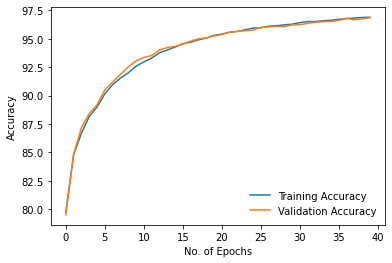

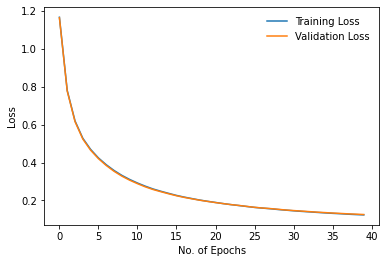

In [7]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

## Test no binary network:

In [8]:
# load model pre trained
path_model = 'trained_models/MNIST/No_binary_models/'
model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded")

Model Loaded


In [9]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 96.91 Avg loss: 0.12


## Run Binary Netwwork:

In [17]:
# parameters model to load no Binary model
binary = True

model, name_model = get_my_model_MNIST(binary)
print(name_model)

Stochastic_ST_first_conv_binary


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [00:16<00:00, 95.65it/s]

Training Results - Epoch: 1  Avg accuracy: 87.21 Avg loss: 0.47


ITERATION - loss: 0.43:   1%|          | 10/844 [00:17<03:35,  3.88it/s] 

Validation Results - Epoch: 1  Avg accuracy: 87.65 Avg loss: 0.46


ITERATION - loss: 0.35: 100%|█████████▉| 840/844 [00:33<00:00, 91.64it/s]

Training Results - Epoch: 2  Avg accuracy: 89.52 Avg loss: 0.37


ITERATION - loss: 0.36:   2%|▏         | 20/844 [00:34<02:31,  5.44it/s]

Validation Results - Epoch: 2  Avg accuracy: 89.87 Avg loss: 0.36


ITERATION - loss: 0.22: 850it [00:51, 87.80it/s]

Training Results - Epoch: 3  Avg accuracy: 91.08 Avg loss: 0.31


ITERATION - loss: 0.28:   1%|          | 10/844 [00:52<03:37,  3.84it/s]

Validation Results - Epoch: 3  Avg accuracy: 91.75 Avg loss: 0.29


ITERATION - loss: 0.52: 100%|█████████▉| 840/844 [01:09<00:00, 92.56it/s]

Training Results - Epoch: 4  Avg accuracy: 92.59 Avg loss: 0.26


ITERATION - loss: 0.39:   2%|▏         | 20/844 [01:10<02:31,  5.44it/s]

Validation Results - Epoch: 4  Avg accuracy: 93.22 Avg loss: 0.25


ITERATION - loss: 0.28: 850it [01:26, 96.35it/s]

Training Results - Epoch: 5  Avg accuracy: 93.47 Avg loss: 0.23


ITERATION - loss: 0.14:   1%|          | 10/844 [01:27<03:30,  3.96it/s]

Validation Results - Epoch: 5  Avg accuracy: 93.97 Avg loss: 0.22


ITERATION - loss: 0.16: 100%|█████████▉| 840/844 [01:43<00:00, 95.76it/s]

Training Results - Epoch: 6  Avg accuracy: 94.32 Avg loss: 0.20


ITERATION - loss: 0.16:   1%|          | 10/844 [01:43<03:30,  3.96it/s] 

Validation Results - Epoch: 6  Avg accuracy: 94.75 Avg loss: 0.19


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [02:00<00:00, 92.30it/s]

Training Results - Epoch: 7  Avg accuracy: 94.68 Avg loss: 0.19


ITERATION - loss: 0.14:   2%|▏         | 20/844 [02:01<02:30,  5.47it/s]

Validation Results - Epoch: 7  Avg accuracy: 95.27 Avg loss: 0.18


ITERATION - loss: 0.16: 850it [02:17, 93.74it/s]

Training Results - Epoch: 8  Avg accuracy: 95.16 Avg loss: 0.17


ITERATION - loss: 0.28:   1%|          | 10/844 [02:18<03:31,  3.95it/s]

Validation Results - Epoch: 8  Avg accuracy: 95.63 Avg loss: 0.16


ITERATION - loss: 0.20: 100%|█████████▉| 840/844 [02:34<00:00, 94.84it/s]

Training Results - Epoch: 9  Avg accuracy: 95.52 Avg loss: 0.16


ITERATION - loss: 0.13:   2%|▏         | 20/844 [02:35<02:28,  5.54it/s]

Validation Results - Epoch: 9  Avg accuracy: 95.73 Avg loss: 0.15


ITERATION - loss: 0.34: 850it [02:51, 94.10it/s]

Training Results - Epoch: 10  Avg accuracy: 95.73 Avg loss: 0.15


ITERATION - loss: 0.29:   1%|          | 10/844 [02:52<03:37,  3.83it/s]

Validation Results - Epoch: 10  Avg accuracy: 96.08 Avg loss: 0.14


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [03:08<00:00, 94.34it/s]

Training Results - Epoch: 11  Avg accuracy: 96.04 Avg loss: 0.14


ITERATION - loss: 0.25:   2%|▏         | 20/844 [03:09<02:28,  5.55it/s]

Validation Results - Epoch: 11  Avg accuracy: 96.35 Avg loss: 0.13


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [03:25<00:00, 97.32it/s]

Training Results - Epoch: 12  Avg accuracy: 96.12 Avg loss: 0.14


ITERATION - loss: 0.07:   2%|▏         | 20/844 [03:26<02:31,  5.43it/s]

Validation Results - Epoch: 12  Avg accuracy: 96.18 Avg loss: 0.14


ITERATION - loss: 0.12: 850it [03:43, 97.50it/s]

Training Results - Epoch: 13  Avg accuracy: 96.37 Avg loss: 0.13


ITERATION - loss: 0.10:   1%|          | 10/844 [03:44<03:30,  3.96it/s]

Validation Results - Epoch: 13  Avg accuracy: 96.47 Avg loss: 0.13


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [04:00<00:00, 96.07it/s]

Training Results - Epoch: 14  Avg accuracy: 96.46 Avg loss: 0.12


ITERATION - loss: 0.06:   2%|▏         | 20/844 [04:01<02:28,  5.56it/s]

Validation Results - Epoch: 14  Avg accuracy: 96.68 Avg loss: 0.12


ITERATION - loss: 0.08: 850it [04:17, 91.48it/s]

Training Results - Epoch: 15  Avg accuracy: 96.63 Avg loss: 0.12


ITERATION - loss: 0.09:   1%|          | 10/844 [04:18<03:32,  3.92it/s]

Validation Results - Epoch: 15  Avg accuracy: 96.67 Avg loss: 0.12


ITERATION - loss: 0.12: 100%|█████████▉| 840/844 [04:34<00:00, 95.00it/s]

Training Results - Epoch: 16  Avg accuracy: 96.75 Avg loss: 0.12


ITERATION - loss: 0.14:   2%|▏         | 20/844 [04:35<02:27,  5.58it/s]

Validation Results - Epoch: 16  Avg accuracy: 96.78 Avg loss: 0.12


ITERATION - loss: 0.07: 100%|█████████▉| 840/844 [04:50<00:00, 92.39it/s]

Training Results - Epoch: 17  Avg accuracy: 96.80 Avg loss: 0.11


ITERATION - loss: 0.04:   2%|▏         | 20/844 [04:51<02:29,  5.53it/s]

Validation Results - Epoch: 17  Avg accuracy: 96.90 Avg loss: 0.11


ITERATION - loss: 0.20: 850it [05:07, 93.89it/s]

Training Results - Epoch: 18  Avg accuracy: 96.83 Avg loss: 0.11


ITERATION - loss: 0.06:   1%|          | 10/844 [05:08<03:28,  3.99it/s]

Validation Results - Epoch: 18  Avg accuracy: 96.92 Avg loss: 0.11


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [05:24<00:00, 98.02it/s]

Training Results - Epoch: 19  Avg accuracy: 97.06 Avg loss: 0.10


ITERATION - loss: 0.13:   2%|▏         | 20/844 [05:25<02:25,  5.65it/s]

Validation Results - Epoch: 19  Avg accuracy: 96.97 Avg loss: 0.11


ITERATION - loss: 0.09: 850it [05:41, 94.97it/s]

Training Results - Epoch: 20  Avg accuracy: 97.02 Avg loss: 0.10


ITERATION - loss: 0.17:   1%|          | 10/844 [05:41<03:26,  4.03it/s]

Validation Results - Epoch: 20  Avg accuracy: 96.90 Avg loss: 0.11


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [05:57<00:00, 98.03it/s]

Training Results - Epoch: 21  Avg accuracy: 97.23 Avg loss: 0.10


ITERATION - loss: 0.17:   1%|          | 10/844 [05:58<03:24,  4.07it/s] 

Validation Results - Epoch: 21  Avg accuracy: 97.07 Avg loss: 0.10


ITERATION - loss: 0.06: 100%|█████████▉| 840/844 [06:14<00:00, 96.96it/s]

Training Results - Epoch: 22  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.16:   2%|▏         | 20/844 [06:15<02:28,  5.53it/s]

Validation Results - Epoch: 22  Avg accuracy: 97.13 Avg loss: 0.10


ITERATION - loss: 0.11: 850it [06:30, 96.09it/s]

Training Results - Epoch: 23  Avg accuracy: 97.30 Avg loss: 0.10


ITERATION - loss: 0.05:   1%|          | 10/844 [06:31<03:21,  4.13it/s]

Validation Results - Epoch: 23  Avg accuracy: 97.13 Avg loss: 0.10


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [06:46<00:00, 98.39it/s]

Training Results - Epoch: 24  Avg accuracy: 97.28 Avg loss: 0.10


ITERATION - loss: 0.13:   1%|          | 10/844 [06:47<03:23,  4.09it/s] 

Validation Results - Epoch: 24  Avg accuracy: 97.02 Avg loss: 0.10


ITERATION - loss: 0.04: 850it [07:02, 102.29it/s]

Training Results - Epoch: 25  Avg accuracy: 97.34 Avg loss: 0.09


ITERATION - loss: 0.04: 850it [07:03, 102.29it/s]

Validation Results - Epoch: 25  Avg accuracy: 97.15 Avg loss: 0.09


ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [07:18<00:00, 101.89it/s]

Training Results - Epoch: 26  Avg accuracy: 97.39 Avg loss: 0.09


ITERATION - loss: 0.17:   2%|▏         | 20/844 [07:19<01:41,  8.12it/s]  

Validation Results - Epoch: 26  Avg accuracy: 97.25 Avg loss: 0.10


ITERATION - loss: 0.05: 100%|█████████▉| 840/844 [07:34<00:00, 99.02it/s]

Training Results - Epoch: 27  Avg accuracy: 97.53 Avg loss: 0.09


ITERATION - loss: 0.05:   1%|          | 10/844 [07:35<03:21,  4.14it/s] 

Validation Results - Epoch: 27  Avg accuracy: 97.20 Avg loss: 0.09


ITERATION - loss: 0.02: 850it [07:50, 101.58it/s]

Training Results - Epoch: 28  Avg accuracy: 97.41 Avg loss: 0.09


ITERATION - loss: 0.02: 850it [07:51, 101.58it/s]

Validation Results - Epoch: 28  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.04: 100%|█████████▉| 840/844 [08:06<00:00, 96.93it/s]

Training Results - Epoch: 29  Avg accuracy: 97.54 Avg loss: 0.09


ITERATION - loss: 0.04:   2%|▏         | 20/844 [08:07<02:22,  5.77it/s]

Validation Results - Epoch: 29  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.23: 850it [08:22, 100.17it/s]

Training Results - Epoch: 30  Avg accuracy: 97.63 Avg loss: 0.08


ITERATION - loss: 0.23: 850it [08:23, 100.17it/s]

Validation Results - Epoch: 30  Avg accuracy: 97.32 Avg loss: 0.09


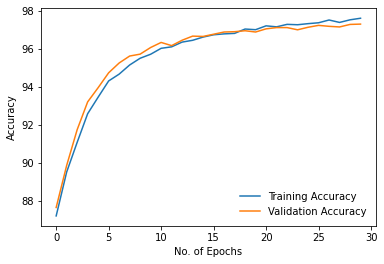

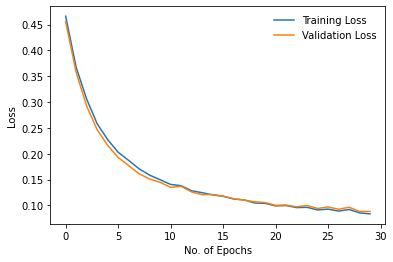

In [18]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

## Test Binary network:

In [29]:
# load model pre trained
path_model = 'trained_models/MNIST/Binary_models/'
model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded")

Model Loaded


In [30]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 97.50 Avg loss: 0.08


# Visualization:

## Modules:

In [0]:
def test_predict_few_examples(model):
    # classes of fashion mnist dataset
    classes = ['0','1','2','3','4','5','6','7','8','9']
    # creating iterator for iterating the dataset
    dataiter = iter(test_loader)
    images, labels = dataiter.next()
    images_arr = []
    labels_arr = []
    pred_arr = []
    # moving model to cpu for inference 
    model.to("cpu")
    # iterating on the dataset to predict the output
    for i in range(0,10):
        images_arr.append(images[i].unsqueeze(0))
        labels_arr.append(labels[i].item())
        ps = torch.exp(model(images_arr[i]))
        ps = ps.data.numpy().squeeze()
        pred_arr.append(np.argmax(ps))
    # plotting the results
    fig = plt.figure(figsize=(25,4))
    for i in range(10):
        ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
        ax.imshow(images_arr[i].resize_(1, 28, 28).numpy().squeeze(), cmap='gray')
        ax.set_title("{} ({})".format(classes[pred_arr[i]], classes[labels_arr[i]]),
                    color=("green" if pred_arr[i]==labels_arr[i] else "red"))

In [0]:
def viz_filters(model):

  for name, m in model.named_modules():
    if type(m)==nn.Conv2d:
      filters = m.weight.data.clone()
      visTensor(filters.cpu(), ch=0, allkernels=False)
      plt.ioff()
      print('Visualization filters learned for layer: {}'.format(name))
      plt.show()

In [0]:
def viz_activations(model, data=None):
  activation = {}

  for name, m in model.named_modules():
    if type(m)==Hardsigmoid:
      m.register_forward_hook(get_activation(name, activation))

  if data==None:
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    index = random.randint(0,len(test_loader))
    image = images[index].unsqueeze(0)
    label = labels[index].item()

  model.cpu()
  output = model(image)

  for keys in activation:
      act_conv = activation[keys].squeeze()
      print('{} for label {}'.format(keys, label))
      visTensor(act_conv.reshape(act_conv.shape[0],1,act_conv.shape[1],act_conv.shape[2]), ch=0, allkernels=False)
      plt.show()
      """
      fig, axarr = plt.subplots(act_conv.size(0), figsize=(50,50))
      for idx in range(act_conv.size(0)):
        axarr[idx].imshow(act_conv[idx])
      plt.show()
      """

In [0]:
def heatmap(model, name_model, index_data=None, save=True):

    activation = {}
    for name, m in model.named_modules():
      if type(m)==Hardsigmoid:
        m.register_forward_hook(get_activation(name, activation))

    if index_data==None:
      index_data = random.randint(0,len(test_loader))

    dataiter = iter(test_loader)
    images, labels = dataiter.next()
    image = images[index_data].unsqueeze(0)
    label = labels[index_data].item()

    model.cpu()
    output = model(image)

    for keys in activation:
      heatmap = torch.mean(activation[keys], dim=0)[0].squeeze()
      heatmap = np.maximum(heatmap, 0)
      heatmap /= torch.max(heatmap)
      print('layer:{} :heatrmap for an image of label {} with model {}'.format(keys, label, name_model))
      plt.matshow(heatmap.squeeze())
      plt.show()
      if save:
        plt.imsave('results/MNIST_results/heatmap_png/heatmap' + 
                  name_model + name + '.png', heatmap)

## Load model:

In [6]:
# load model pre trained no binary
binary = False
model_no_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/'
model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded", name_model)

Model Loaded NonBinaryNet


In [7]:
# load model pre trained binary
binary = True    
model_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/Binary_models/'
model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded", name_model)

Model Loaded Stochastic_ST_first_conv_binary


## Visualization few prediction:

No binary model


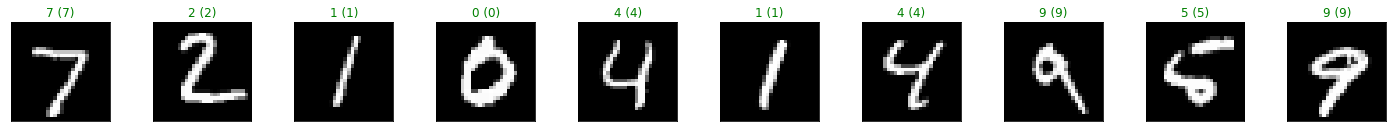

Binary model


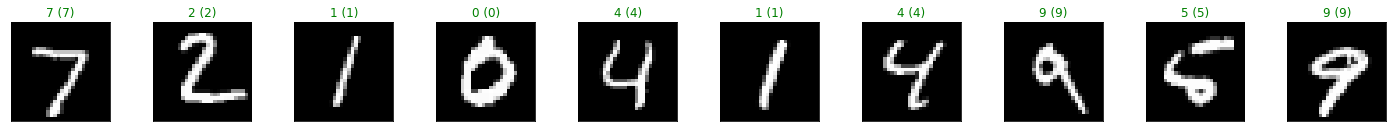

In [11]:
print('No binary model')
test_predict_few_examples(model_no_binary)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary)
plt.show()

## Visualization Activations values for a specific data:

act_layer1


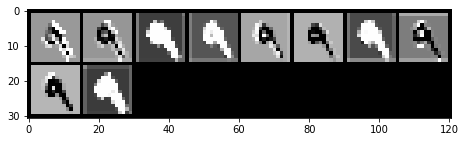

act_layer2


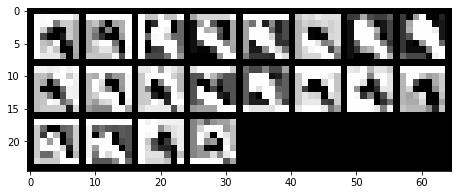

In [67]:
viz_activations(model_no_binary)

act_layer1.act


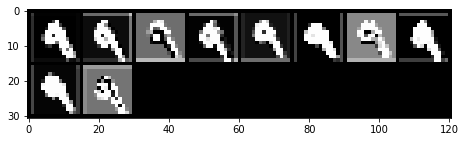

act_layer2


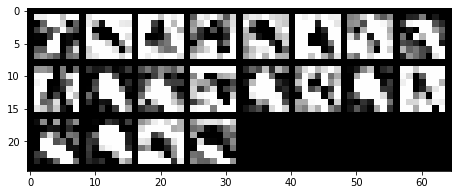

In [69]:
viz_activations(model_binary)

## Visualization heatmap for a specific data:


layer:act_layer1 :heatrmap for an image of label 0 with model Stochastic_ST_first_conv_binary


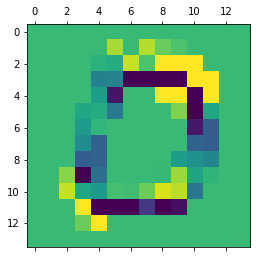

layer:act_layer2 :heatrmap for an image of label 0 with model Stochastic_ST_first_conv_binary


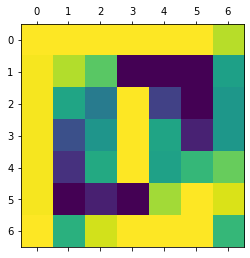

In [92]:
index_data = 10
heatmap(model_no_binary, name_model, index_data)

layer:act_layer1.act :heatrmap for an image of label 0 with model Stochastic_ST_first_conv_binary


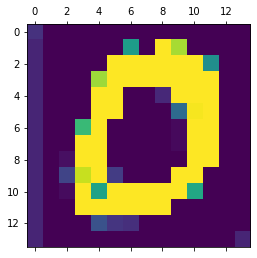

layer:act_layer2 :heatrmap for an image of label 0 with model Stochastic_ST_first_conv_binary


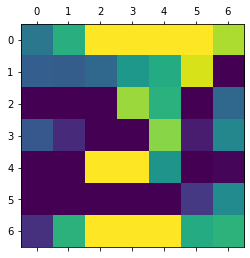

In [93]:
index_data = 10
heatmap(model_binary, name_model, index_data)

## Visualization filters trained:

Visualization filters learned for layer: layer1


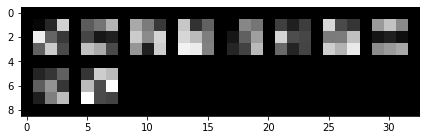

Visualization filters learned for layer: layer2


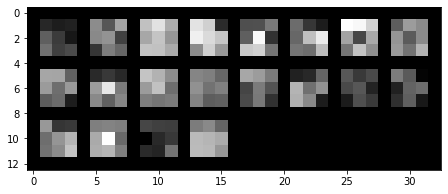

In [12]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


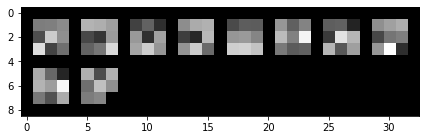

Visualization filters learned for layer: layer2


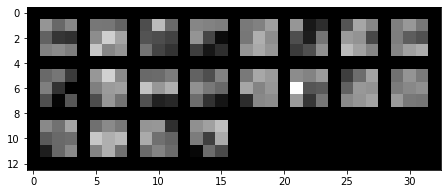

In [13]:
viz_filters(model_binary)